In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import

In [2]:
x = pd.read_csv('../data/x_prepped.csv',index_col=0)
x.head()

,ABV,IBU,global_rating,total,IPA - American,IPA - Imperial / Double,IPA - New England,IPA - Session / India Session Ale,Pale Ale - American,30 Mile Brewing Co.,...,SweetWater Brewing Company,Thimble Island Brewing Company,Thomas Hooker Brewing Co.,Top Shelf Brewing Company,Tree House Brewing Company,Trillium Brewing Company,Tröegs Independent Brewing,Two Roads Brewing Company,Veracious Brewing Company,Wicked Weed Brewing
18433,0.487964,-0.156481,0.314495,-0.308574,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18434,-0.382043,-1.328470,0.270798,-0.308574,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18435,-0.266042,-1.328470,0.445586,-0.308574,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18436,0.197962,-0.297119,-0.035080,-0.308574,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18437,-1.136049,-1.469109,-0.013231,-0.308574,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y = pd.read_csv('../data/y_prepped.csv',index_col=0)
y.head()

,user_rating
18433,4.0
18434,4.0
18435,3.0
18436,3.5
18437,4.0


## Data Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y['user_rating'], test_size=0.2, random_state=12)

In [8]:
X_train.head()

,ABV,IBU,global_rating,total,IPA - American,IPA - Imperial / Double,IPA - New England,IPA - Session / India Session Ale,Pale Ale - American,30 Mile Brewing Co.,...,SweetWater Brewing Company,Thimble Island Brewing Company,Thomas Hooker Brewing Co.,Top Shelf Brewing Company,Tree House Brewing Company,Trillium Brewing Company,Tröegs Independent Brewing,Two Roads Brewing Company,Veracious Brewing Company,Wicked Weed Brewing
19775,-0.382043,0.000000,0.314495,-0.308574,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19870,-0.440044,-0.953434,0.576676,-0.308574,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18910,-0.034040,0.000000,1.385067,1.196663,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
18675,0.023960,1.015509,0.401889,-0.308574,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21303,-1.252050,-0.578397,-0.056928,-0.308574,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
y_train.head()

19775    4.25
19870    3.00
18910    4.50
18675    4.00
21303    3.50
Name: user_rating, dtype: float64

## Modeling - Lasso

### Default Alpha

In [83]:
from sklearn.linear_model import Lasso

lasso = Lasso(normalize=True, random_state=12)

lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=12, selection='cyclic',
      tol=0.0001, warm_start=False)

In [85]:
predictions = lasso.predict(X_test)
results_df = pd.DataFrame([predictions,y_test]).transpose()
results_df.columns = ['prediction', 'actual']
results_df.head()

In [87]:
results_df['error'] = results_df['prediction'] - results_df['actual']
results_df.head()

,prediction,actual,error
0,3.828113,4.00,-0.171887
1,3.828113,3.25,0.578113
2,3.828113,3.75,0.078113
3,3.828113,4.00,-0.171887
4,3.828113,1.25,2.578113


In [88]:
avg_error = np.mean(results_df['error'])
std_error = np.std(results_df['error'])
print('avg error', avg_error, 
      '\n'
      'std of error', std_error)

avg error 0.018077382865431816 
std of error 0.5796704303353049


In [89]:
mse = np.mean(results_df['error']**2)
mse

0.3363445995763809

In [119]:
r2 = lasso.score(X_test, y_test)
r2

-0.0009725430131157786

In [120]:
n_within_half_error = len(abs(results_df['error'])[abs(results_df['error']) <= 0.5])
percent_within_half_error = 100*(n_within_half_error / len(results_df))
percent_within_half_error

71.47058823529412

''

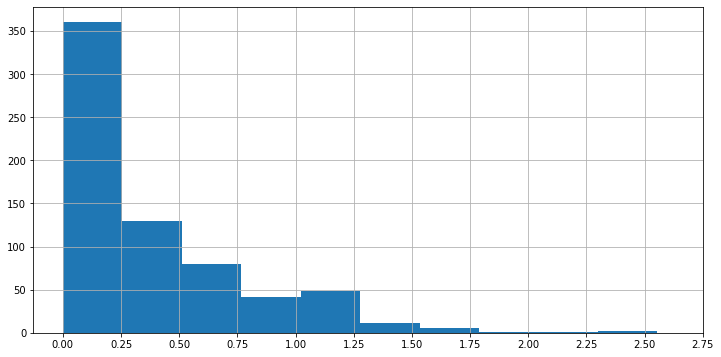

In [121]:
plt.figure(figsize=(12,6))

plt.hist(abs(results_df['error']), bins=10)
plt.xticks(ticks=(np.arange(0, 3, step=0.25)))
plt.grid()
;

### Lasso CV

In [10]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(normalize=True, random_state=12)

In [11]:
lasso_cv.fit(X_train, y_train)

C:\Users\tomsharp\AppData\Local\Continuum\miniconda3\envs\ml_guild\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=12, selection='cyclic',
        tol=0.0001, verbose=False)

In [12]:
lasso_cv.alpha_

0.00030514907897911557

In [13]:
lasso_cv.intercept_

3.8238096983554732

In [14]:
r2_cv = lasso_cv.score(X_train, y_train)
print(r2_cv)

0.0975937293906678


In [15]:
predictions = lasso_cv.predict(X_test)
results_df_cv = pd.DataFrame({'y_test':y_test, 'predictions':predictions})
results_df_cv['error'] = results_df_cv['y_test'] - results_df_cv['predictions']
results_df_cv.head()

,y_test,predictions,error
20920,4.00,3.832168,0.167832
20452,3.25,3.798355,-0.548355
19001,3.75,3.861897,-0.111897
20978,4.00,3.812060,0.187940
20635,1.25,3.736423,-2.486423


In [17]:
mse_cv = np.mean(results_df_cv['error']**2)
mse_cv

0.3122433914983586

In [19]:
n_within_half_error_cv = len(abs(results_df_cv['error'])[abs(results_df_cv['error']) <= 0.5])
percent_within_half_error_cv = 100*(n_within_half_error_cv / len(results_df_cv))
percent_within_half_error_cv

71.47058823529412

''

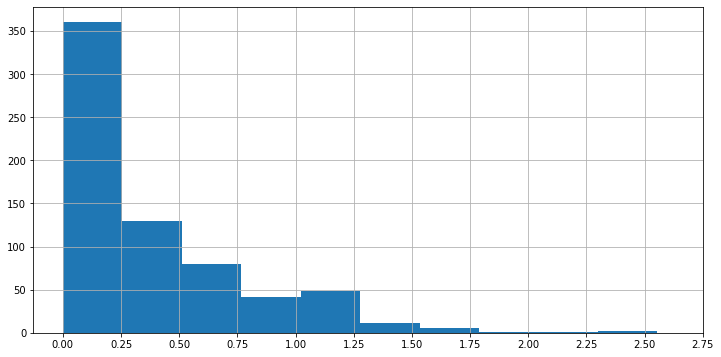

In [20]:
plt.figure(figsize=(12,6))

plt.hist(abs(results_df_cv['error']), bins=10)
plt.xticks(ticks=(np.arange(0, 3, step=0.25)))
plt.grid()
;

## Export Model

In [21]:
final_lasso_model = lasso_cv

In [22]:
import pickle

In [23]:
with open('../models/lasso.pkl', 'wb') as pickle_file:
    pickle.dump(final_lasso_model, pickle_file)